<a href="https://colab.research.google.com/github/suruchichoudhary122/EditQuasar/blob/main/project_1_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics


importing dataset


In [20]:
house_price_Dataset=pd.read_csv('house_price_regression_dataset.csv')


In [21]:
print(house_price_Dataset)


     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0                     5  2.623829e+05  
1

In [22]:
#loadiing the dataset to pandas dataframe
house_price_Dataset=pd.DataFrame(house_price_Dataset)


In [23]:
house_price_Dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [24]:
house_price_Dataset.shape

(1000, 8)

In [25]:
house_price_Dataset.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [26]:
house_price_Dataset.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


understanding the correalation between various features in the data sets

1.positive correlation
2. negative correlation


In [27]:

correlation=house_price_Dataset.corr()


<Axes: >

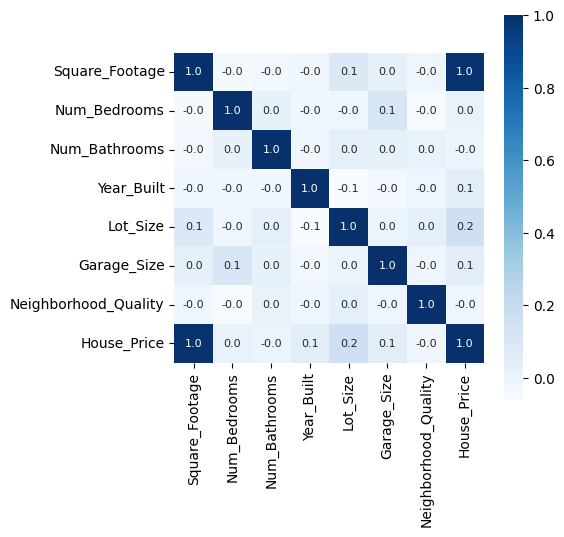

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation , cbar= True , square=True , fmt='.1f' , annot=True , annot_kws={'size':8} , cmap='Blues')

splitting the data


In [31]:
X=house_price_Dataset.drop(['House_Price'] , axis=1)
Y=house_price_Dataset['House_Price']

In [32]:
print(X)
print(Y)

     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality  
0              0                     5  
1              1             

In [35]:
X_train,X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape , X_test.shape , X_train.shape)

(1000, 7) (200, 7) (800, 7)


In [40]:
#loading the model

In [41]:
model= XGBRegressor()

In [42]:
#training the model woth Xtrain
model.fit(X_train ,Y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation


In [43]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [44]:
print(training_data_prediction)

[ 250145.55   398300.1    523322.22   513455.4    608513.56   764813.06
  342107.62  1031982.75   419545.1    252037.05   761592.6    823397.56
  269303.4    927583.3    817582.1    570045.44   312953.97   512990.03
  722010.94   689011.1    707476.25   303270.2    654954.6    605704.4
 1034218.4    149696.42   346874.6    396371.06   855995.06   965066.7
  321494.66   527132.75   673446.56   190861.11   496828.5    372749.5
 1040711.94   415480.97   370935.06   751178.3    401420.03   761487.94
  194699.45   438893.2    322630.62   316282.4    643782.56  1038254.3
  715291.44   271171.62   351632.84   481015.2    560922.6    691062.56
 1027818.6    769228.3   1068324.2    853158.8    922727.44   209960.4
  629568.44   874974.3    988166.6    809713.7    335971.5    860177.9
  778502.2    690987.6    183579.83   270578.06   211847.67   880496.6
  740118.7    896217.    1041756.9    525320.06   775661.94   740126.9
  417063.88   551353.6    476521.03   595193.2    470459.62   846218.06


In [49]:
#r square error
score_1=metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_train, training_data_prediction)

print("r square error :",  score_1)
print ("mean square error :" , score_2)

r square error : 0.9999907131204461
mean square error : 542.0585522783996


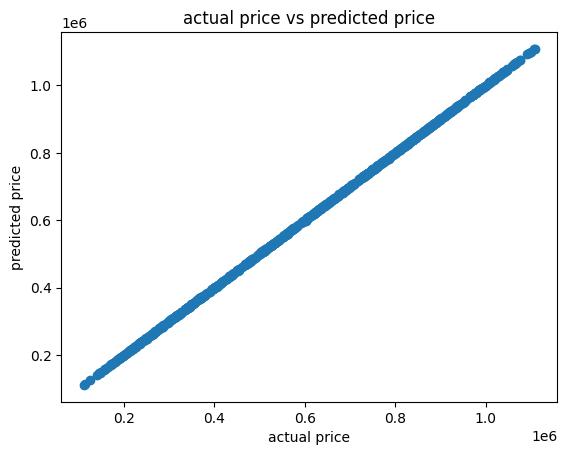

In [53]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [50]:
test_data_prediction = model.predict(X_test)


In [51]:
print(test_data_prediction)

[ 599386.06  237929.3   959246.   1035410.1   751947.9  1028372.5
  509449.    335582.7   835415.94  548436.6   481336.1   765440.5
 1019396.5   174404.31  346420.53  280476.16  481192.9   468835.4
  229046.05  235352.9   237727.97  186790.45  434674.5   629981.4
  894235.9   808314.    284188.9   263747.97 1037380.5   725260.9
  639205.44  890451.06 1075969.4   885218.7   672776.44  807219.5
  580624.5   468260.66  716776.2   988033.25  471353.47  457817.88
  558907.56  244750.67  549248.75  484849.78  215947.11  733557.2
  668043.7   772170.2  1036206.6   483280.94  741846.06  431467.97
  309529.75  555016.9   718538.56  872684.4   739329.2   714958.9
  504056.66  677949.8   466372.44  697108.6   735559.56  422172.6
  586554.    777543.9   369492.84 1019360.75  741861.56  994752.75
  715913.9   874750.5   783261.    788010.1   901020.2   594392.25
  501721.03  774987.    987568.44 1066177.9   724206.25  312419.22
  461544.9   879397.6   999923.5   762317.25  955541.56  397954.25
  14

In [52]:
#r square error
score_1=metrics.r2_score(Y_test, test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_test, test_data_prediction)

print("r square error :",  score_1)
print ("mean square error :" , score_2)

r square error : 0.9941140671600065
mean square error : 15575.513763618923
